In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
#By library is used to find the location of element by XPATH
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time
from bs4 import BeautifulSoup as bs

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml"><head><script async="" src="//cdn.tinypass.com/api/tinypass.min.js" type="text/javascript"></script><script async="" src="https://experience.tinypass.com/xbuilder/experience/load?aid=cfQj2fM3zj" type="text/javascript"></script><script async="" src="http://b.scorecardresearch.com/c2/6035728/cs.js" type="text/javascript"></script><script async="" src="https://uid1.vindicosuite.com/js/tm.js?r=&amp;u=http%3A%2F%2Ffortune.com%2Ffortune500%2Flist%2F&amp;tid=2bd0e4ef-f2df-42ff-b03c-8423f787258d" type="text/javascript"></script><script src="https://cdn.krxd.net/userdata/get?pub=1b008fc9-b074-4b2e-8e4a-c1e1f07d344b&amp;kxfp=338a0e8731b60c33bee2e2a90d16e09f2d13f061&amp;technographics=1&amp;callback=Krux.ns.meredith.kxjsonp_userdata" type="text/javascript"></script><script src="https://beacon.krxd.net/optout_check?callback=Krux.ns.meredith.kxjsonp_optOutCheck" type="text/javascript"></script><script src="http://www.googletagservices.com/a
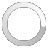

In [15]:
#Approach1 Using Selenium webdriver(not for assignment 2)
browser = webdriver.Chrome(executable_path=r'C:\Users\Aditya\Downloads\chromedriver_win32\chromedriver')
browser.get("http://fortune.com/fortune500/list/")

# Selenium script to scroll to the bottom, wait  seconds for the next batch of data to load, then continue scrolling.  It will continue to do this until the page stops loading new data.
lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False
while(match==False):
                lastCount = lenOfPage
                time.sleep(10)
                lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
                if lastCount==lenOfPage:
                    match=True


source_data = browser.page_source


bs_data = bs(source_data)



In [20]:

html_data = bs(source_data,'html.parser')
type(html_data)

bs4.BeautifulSoup

In [25]:
container = bs_data.find_all("span",{'class':'column small-5 company-title'})

In [26]:
com_values = [x.get_text() for x in container]

In [27]:
for y in com_values:
    print(y)
    

Walmart
Exxon Mobil
Berkshire Hathaway
Apple
UnitedHealth Group
McKesson
CVS Health
Amazon.com
AT&T
General Motors
Ford Motor
AmerisourceBergen
Chevron
Cardinal Health
Costco
Verizon
Kroger
General Electric
Walgreens Boots Alliance
JPMorgan Chase
Fannie Mae
Alphabet
Home Depot
Bank of America Corp.
Express Scripts Holding
Wells Fargo
Boeing
Phillips 66
Anthem
Microsoft
Valero Energy
Citigroup
Comcast
IBM
Dell Technologies
State Farm Insurance Cos.
Johnson & Johnson
Freddie Mac
Target
Lowe’s
Marathon Petroleum
Procter & Gamble
MetLife
UPS
PepsiCo
Intel
DowDuPont
Archer Daniels Midland
Aetna
FedEx
United Technologies
Prudential Financial
Albertsons Cos.
Sysco
Disney
Humana
Pfizer
HP
Lockheed Martin
AIG
Centene
Cisco Systems
HCA Healthcare
Energy Transfer Equity
Caterpillar
Nationwide
Morgan Stanley
Liberty Mutual Insurance Group
New York Life Insurance
Goldman Sachs Group
American Airlines Group
Best Buy
Cigna
Charter Communications
Delta Air Lines
Facebook
Honeywell International
Merck


In [28]:
len(com_values)

150

In [17]:
#Here, data of top 500 companies is extracted(assignment2 starts here)
import json
import requests
import datetime
from pandas.io.json import json_normalize as jn
i= 50
j = 50
company_id=[]
company_name=[]
company_ranking=[]
company_prev_ranking=[]
company_revenue=[]
company_profit=[]
company_assets=[]
company_marketval=[]
company_employees=[]
company_ticker=[]
company_sector=[]
company_industry=[]
company_hqloc=[]
company_hqaddress=[]
company_hqcity=[]
company_hqstate=[]
company_hqzip=[]
company_hqtel=[]
ceo=[]
ceo_title=[]
website=[]
rank_gain=[]
rank_drop=[]
profitable=[]
ceo_founder=[]
ceo_woman=[] 
job_growth=[]         
facebook_title=[]


# Header in order to get avoided for blocking
# Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.80 Safari/537.36
for i in range(50,500):
    r = requests.get('http://fortune.com/api/v2/list/2358051/expand/item/ranking/asc/'+str(i)+'/'+str(j))
    i=+50
    data = r.json()
    with open("data_file.json", "w") as write:
     json.dump(data,write, indent = 4)

    json_data = jn(data)
    

    for k, data in enumerate(json_data['list-items'][0]):
        company_id.append(data['meta']['slug']+str(k))
        company_name.append(data['meta']['fullname'])
        company_ranking.append(data['meta']['ranking'])
        company_prev_ranking.append(data['meta']['prevrank'])
        company_revenue.append(data['meta']['revenues'])
        company_profit.append(data['meta']['profits'])
        company_assets.append(data['meta']['assets'])
        #company_marketval.append(data['meta']['mktval'])
        company_employees.append(data['meta']['employees'])
        #company_ticker.append(data['meta']['ticker'])
        company_sector.append(data['meta']['sector'])
        company_industry.append(data['meta']['industry'])
        company_hqloc.append(data['meta']['hqlocation'])
        company_hqaddress.append(data['meta']['hqaddr'])
        company_hqcity.append(data['meta']['hqcity'])
        company_hqstate.append(data['meta']['hqstate'])
        company_hqzip.append(data['meta']['hqzip'])
        company_hqtel.append(data['meta']['hqtel'])
        ceo.append(data['meta']['ceo'])
        ceo_title.append(data['meta']['ceo-title'])
        website.append(data['meta']['website'])
        #rank_gain.append(data['meta']['rankgain'])
        #rank_drop.append(data['meta']['rankdrop'])
        profitable.append(data['meta']['profitable'])
        ceo_founder.append(data['meta']['ceofounder'])
        ceo_woman.append(data['meta']['ceowoman'])
        job_growth.append(data['meta']['jobgrowth'])          
        facebook_title.append(data['social']['facebook']['title'])

In [23]:
import pandas as pd

#created test_df dataframe using Pandas Library
company_dataframe = pd.DataFrame({"company_id":company_id,
                        "company_name":company_name,
                        "company_ranking":company_ranking,
                        "company_prev_ranking":company_prev_ranking,
                        "company_revenue":company_revenue,
                        "company_profit":company_profit,
                        "company_assets":company_assets,
                      # "company_marketval":company_marketval,
                        "company_employees":company_employees,
                        #"company_ticker":company_ticker,
                        "company_sector":company_sector,
                        "company_industry":company_industry,
                        "company_hqloc":company_hqloc,
                        "company_hqaddress":company_hqaddress,
                        "company_hqcity":company_hqcity,
                        "company_hqstate":company_hqstate,
                        "company_hqzip":company_hqzip,
                        "company_hqtel":company_hqtel,
                        "ceo":ceo,
                        "ceo_title":ceo_title,
                        "website":website,
                        #"rank_gain":rank_gain,
                        #"rank_drop":rank_drop,
                        "profitable":profitable,
                        "ceo_founder":ceo_founder,
                        "ceo_woman":ceo_woman,
                        "job_growth":job_growth,     
                        "facebook_title":facebook_title
                        })

In [2]:
company_dataframe.to_csv('company_dataframe.csv')

NameError: name 'company_dataframe' is not defined

In [3]:
import pandas as pd
company_dataframe = pd.read_csv('company_dataframe_duplicate_removed.csv')
company_dataframe.set_index('company_id',drop=True,append=False,inplace=True)
company_dataframe




,Unnamed: 0,company_name,company_ranking,company_prev_ranking,company_revenue,company_profit,company_assets,company_employees,company_sector,company_industry,...,company_hqzip,company_hqtel,ceo,ceo_title,website,profitable,ceo_founder,ceo_woman,job_growth,facebook_title
company_id,,,,,,,,,,,,,,,,,,,,,
united-technologies0,0,United Technologies Corporation,51,50.0,59837.0,4552.0,96920.0,204700,Aerospace & Defense,Aerospace and Defense,...,6032,860-728-7000,Gregory J. Hayes,"Chairman, President & Chief Executive Officer",http://www.utc.com,yes,no,no,yes,United Technologies
prudential-financial1,1,"Prudential Financial, Inc.",52,48.0,59689.0,7863.0,831921.0,49705,Financials,"Insurance: Life, Health (stock)",...,7102,973-802-6000,John R. Strangfeld,"Chairman, President & Chief Executive Officer",http://www.prudential.com,yes,no,no,no,Prudential Financial
albertsons-cos2,2,"Albertsons Companies, Inc.",53,49.0,59678.2,-373.3,23755.0,273000,Food & Drug Stores,Food and Drug Stores,...,83706,208-395-6200,Robert G. Miller,Chairman & Chief Executive Officer,http://www.albertsons.com,no,no,no,no,Albertsons Cos.
sysco3,3,Sysco Corporation,54,57.0,55371.1,1142.5,17756.7,66500,Wholesalers,Wholesalers: Food and Grocery,...,77077,281-584-1390,NaN,"President, Chief Executive Officer & Director",http://www.sysco.com,yes,no,no,yes,Sysco
disney4,4,The Walt Disney Company,55,52.0,55137.0,8980.0,95789.0,199000,Media,Entertainment,...,91521,818-560-1000,Robert A. Iger,Chairman & Chief Executive Officer,http://www.disney.com,yes,no,no,yes,Disney
humana5,5,Humana Inc.,56,53.0,53767.0,2448.0,27178.0,45900,Health Care,Health Care: Insurance and Managed Care,...,40202,502-580-1000,Bruce D. Broussard,"President, Chief Executive Officer & Director",http://www.humana.com,yes,no,no,no,Humana
pfizer6,6,Pfizer Inc.,57,54.0,52546.0,21308.0,171797.0,90200,Health Care,Pharmaceuticals,...,10017,212-733-2323,Ian C. Read,Chairman & Chief Executive Officer,http://www.pfizer.com,yes,no,no,no,Pfizer
hp7,7,HP Inc.,58,61.0,52056.0,2526.0,32913.0,49000,Technology,"Computers, Office Equipment",...,94304,650-857-1501,Dion J. Weisler,"President, Chief Executive Officer & Director",http://www.hp.com,yes,no,no,no,HP
lockheed-martin8,8,Lockheed Martin Corporation,59,56.0,51048.0,2002.0,46521.0,100000,Aerospace & Defense,Aerospace and Defense,...,20817,301-897-6000,Marillyn A. Hewson,"Chairman, President & Chief Executive Officer",http://www.lockheedmartin.com,yes,no,yes,yes,Lockheed Martin


In [4]:
print(company_dataframe.columns.tolist())

['Unnamed: 0', 'company_name', 'company_ranking', 'company_prev_ranking', 'company_revenue', 'company_profit', 'company_assets', 'company_employees', 'company_sector', 'company_industry', 'company_hqloc', 'company_hqaddress', 'company_hqcity', 'company_hqstate', 'company_hqzip', 'company_hqtel', 'ceo', 'ceo_title', 'website', 'profitable', 'ceo_founder', 'ceo_woman', 'job_growth', 'facebook_title']


In [5]:
company_dataframe.drop(['Unnamed: 0'], axis=1)

,company_name,company_ranking,company_prev_ranking,company_revenue,company_profit,company_assets,company_employees,company_sector,company_industry,company_hqloc,...,company_hqzip,company_hqtel,ceo,ceo_title,website,profitable,ceo_founder,ceo_woman,job_growth,facebook_title
company_id,,,,,,,,,,,,,,,,,,,,,
united-technologies0,United Technologies Corporation,51,50.0,59837.0,4552.0,96920.0,204700,Aerospace & Defense,Aerospace and Defense,"Farmington, Conn.",...,6032,860-728-7000,Gregory J. Hayes,"Chairman, President & Chief Executive Officer",http://www.utc.com,yes,no,no,yes,United Technologies
prudential-financial1,"Prudential Financial, Inc.",52,48.0,59689.0,7863.0,831921.0,49705,Financials,"Insurance: Life, Health (stock)","Newark, N.J.",...,7102,973-802-6000,John R. Strangfeld,"Chairman, President & Chief Executive Officer",http://www.prudential.com,yes,no,no,no,Prudential Financial
albertsons-cos2,"Albertsons Companies, Inc.",53,49.0,59678.2,-373.3,23755.0,273000,Food & Drug Stores,Food and Drug Stores,"Boise, Idaho",...,83706,208-395-6200,Robert G. Miller,Chairman & Chief Executive Officer,http://www.albertsons.com,no,no,no,no,Albertsons Cos.
sysco3,Sysco Corporation,54,57.0,55371.1,1142.5,17756.7,66500,Wholesalers,Wholesalers: Food and Grocery,Houston,...,77077,281-584-1390,NaN,"President, Chief Executive Officer & Director",http://www.sysco.com,yes,no,no,yes,Sysco
disney4,The Walt Disney Company,55,52.0,55137.0,8980.0,95789.0,199000,Media,Entertainment,"Burbank, Calif.",...,91521,818-560-1000,Robert A. Iger,Chairman & Chief Executive Officer,http://www.disney.com,yes,no,no,yes,Disney
humana5,Humana Inc.,56,53.0,53767.0,2448.0,27178.0,45900,Health Care,Health Care: Insurance and Managed Care,"Louisville, Ky.",...,40202,502-580-1000,Bruce D. Broussard,"President, Chief Executive Officer & Director",http://www.humana.com,yes,no,no,no,Humana
pfizer6,Pfizer Inc.,57,54.0,52546.0,21308.0,171797.0,90200,Health Care,Pharmaceuticals,New York City,...,10017,212-733-2323,Ian C. Read,Chairman & Chief Executive Officer,http://www.pfizer.com,yes,no,no,no,Pfizer
hp7,HP Inc.,58,61.0,52056.0,2526.0,32913.0,49000,Technology,"Computers, Office Equipment","Palo Alto, Calif.",...,94304,650-857-1501,Dion J. Weisler,"President, Chief Executive Officer & Director",http://www.hp.com,yes,no,no,no,HP
lockheed-martin8,Lockheed Martin Corporation,59,56.0,51048.0,2002.0,46521.0,100000,Aerospace & Defense,Aerospace and Defense,"Bethesda, Md.",...,20817,301-897-6000,Marillyn A. Hewson,"Chairman, President & Chief Executive Officer",http://www.lockheedmartin.com,yes,no,yes,yes,Lockheed Martin


In [6]:
ceo_table = company_dataframe.filter(['company_id','ceo','ceo_title','ceo_founder','ceo_woman'])


In [7]:
ceo_table.to_csv('ceo_dataframe.csv')


In [8]:
finance_table = company_dataframe.filter(['company_id','company_name','company_revenue','company_profit','company_assets'])

In [36]:
import json
import tweepy
auth = tweepy.OAuthHandler('sXYRrKGbTIJcqWukG3YcRzSau', 'E3MHxRbzKU2SqOuxzqU8AsPdPwggP8nmm7EutbfALvJ1GPJVay')
auth.set_access_token('2413743440-iWxGOECO02oN3wGJGxO50p3pyBjI9hC85rFaTY3', 'B526BwptAsNykIR9V1XLScuGDSaT3KuVh8ba3eu6gY0ew')
api = tweepy.API(auth)
json_str_new=[]
users=[]
users_company_id=[]

for i in company_dataframe['company_name']:
    users.append(api.search_users(i,20,10))
    users_company_id.append(i)

#users.append(api.search_users('United Technologies Corporation',20,10))


In [35]:
users

[[User(_api=<tweepy.api.API object at 0x0000026A23747DD8>, _json={'id': 6717192, 'id_str': '6717192', 'name': 'United Technologies', 'screen_name': 'UTC', 'location': 'Farmington, CT', 'description': 'United Technologies Corp. (UTC) serves the commercial aerospace, defense & building industries. We’re innovating an extraordinary future.', 'url': 'https://t.co/SKDcXxku4y', 'entities': {'url': {'urls': [{'url': 'https://t.co/SKDcXxku4y', 'expanded_url': 'http://www.utc.com', 'display_url': 'utc.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 41155, 'friends_count': 763, 'listed_count': 650, 'created_at': 'Sun Jun 10 15:55:26 +0000 2007', 'favourites_count': 3421, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 6690, 'lang': 'en', 'status': {'created_at': 'Thu Feb 21 20:02:27 +0000 2019', 'id': 1098674331742285826, 'id_str': '1098674331742285826', 'text': "RT @UTCpolicy: Where the girls at?! 

In [37]:
import json
from pandas.io.json import json_normalize
user_screen_name=[]
user_name=[]
user_des=[]
user_follower=[]
user_status=[]
user_url=[]
user_location =[]
user_company_id=[]
for j, user in enumerate(users):
    for i in user:
        user_screen_name.append(i.screen_name)
        user_name.append(i.name)
        user_des.append(i.description)
        user_follower.append(i.followers_count)
        user_status.append(i.statuses_count)
        user_url.append(i.url)
        user_location.append(i.location)
        user_company_id.append(users_company_id[j])
        
 
#twitter_data = json_normalize(users)

#twitter_data.to_csv("consumers.csv")

In [38]:
users_dataframe = pd.DataFrame({"user_screen_name":user_screen_name,
                                "user_name":user_name,
                                "user_des":user_des,
                                "user_follower":user_follower,
                                "user_status":user_status,
                                "user_url":user_url,
                                "user_company_id":user_company_id})

In [39]:
users_dataframe.to_csv("users2.csv")

In [43]:
from pandas.io import sql
import sqlite3
conn = sqlite3.connect('company_analysis.db')

users_dataframe.to_sql('users_table', conn)
c=conn.cursor()




In [50]:
c=conn.cursor()
c.execute("SELECT * FROM users_table")
print(c.fetchmany(5))

[(0, 'UTC', 'United Technologies', 'United Technologies Corp. (UTC) serves the commercial aerospace, defense & building industries. We’re innovating an extraordinary future.', 41157, 6690, 'https://t.co/SKDcXxku4y', 'United Technologies Corporation'), (1, 'Broadcom', 'Broadcom Inc.', 'Broadcom Inc. (NASDAQ: AVGO) is a global technology leader that designs,\ndevelops and supplies semiconductor and infrastructure software solutions.', 43609, 5231, 'http://t.co/w8NxmvySN4', 'United Technologies Corporation'), (2, 'Brocade', 'Brocade', 'Brocade is now a Broadcom Inc. group company. Be sure to follow the @Broadcom page to receive future company updates.', 46945, 12641, 'https://t.co/w8NxmvQubE', 'United Technologies Corporation'), (3, 'ATT', 'AT&T', 'Connecting you to more of your tweet, tag, retweet, follow thing - that’s our thing.', 864747, 113456, 'https://t.co/IyWcCz5IjC', 'United Technologies Corporation'), (4, 'WittenBrian', 'Brian Witten', 'United Technologies Corporation\nTech@UTC!

In [93]:
import praw

reddit = praw.Reddit(user_agent='Comment Extraction (by /u/adiHusky)',
                     client_id='z8lRRJKEXTf-pg', client_secret="qMWoffqwqOGF9emzT5ICPXp4eMM",
                     username='adihusky', password='adihusky')



In [ ]:
reddit_author=[]
reddit_title=[]
reddit_created_at=[]
reddit_submission_id=[]
reddit_comments_no=[]
reddit_score=[]
reddit_upvote_ratio=[]
company_id=[]
all = reddit.subreddit("all")

for j, data in enumerate(company_dataframe['company_name']):
    for i in all.search(data):
         reddit_author.append(i.author)
         reddit_title.append(i.title)
         reddit_created_at.append(i.created_utc)
         reddit_submission_id.append(i.id)
         reddit_comments_no.append(i.num_comments)
         reddit_score.append(i.score)
         reddit_upvote_ratio.append(i.upvote_ratio)
         company_id.append(data)
        
reddit_dataframe = pd.DataFrame({"reddit_author":reddit_author,
                                "reddit_created_at":reddit_created_at,
                                "reddit_title":reddit_title,
                                "reddit_submission_id":reddit_submission_id,
                                "reddit_comments_no":reddit_comments_no,
                                "reddit_upvote_ratio":reddit_upvote_ratio,
                                "company_id":company_id})   

reddit_dataframe.to_csv("reddit_dataframe.csv")
